In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
from matplotlib import ticker
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
import idaes.core.util.model_statistics as stats

In [3]:
import watertap_contrib.seto.analysis.net_metering.PV_RO as PV_RO
# from watertap_contrib.seto.analysis.tools.viz_templates import contour_LCOW
from pyomo.environ import value, units as pyunits

/Users/zbinger/watertap-seto/src/watertap_contrib/seto/analysis/net_metering


In [58]:
def contour_LCOW(x, y, z, levels, x_label='', y_label='', z_label='', x_scale='linear', y_scale='linear', low=-1, mid=0, high=1, xlimits = [0.001, 0.1], ylimits = [30, 150], cmap_pallete="RdBu_r", contour_x_pos=1, contour_label_space=0, **kwargs):

    divnorm = colors.TwoSlopeNorm(vmin=low, vcenter=mid, vmax=high)
    # divnorm = colors.CenteredNorm(vcenter=mid)

    manual_locations = [(contour_x_pos, 40), (contour_x_pos, 50), (contour_x_pos, 60), (contour_x_pos, 70), (contour_x_pos, 80), (contour_x_pos, 100), (contour_x_pos, 110)]
    manual_locations = [(contour_x_pos, 40), (contour_x_pos, 60), (contour_x_pos, 80), (contour_x_pos, 100)]

    fig, ax = plt.subplots(figsize=(5,4))
    if levels != None:
        cs2 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cs3 = ax.contour(x, y, z, levels, colors='k', linewidths=2, linestyles='dashed', norm=divnorm)
        ax.clabel(cs3, fmt='$%1.2f ', colors='k', fontsize=12, inline_spacing=contour_label_space, manual=manual_locations)
        cbar = fig.colorbar(cs2)
    else:
        cs1 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cbar = fig.colorbar(cs1)


    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()

    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_fontsize(16)

    cbar.ax.yaxis.set_major_formatter('${x:1.2f}')
    cbar.ax.get_yaxis().labelpad = 10
    cbar.ax.set_ylabel(z_label, rotation=90, fontsize=16)

    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_xlim(xlimits[0],xlimits[1])
    ax.set_ylim(ylimits[0],ylimits[1])
    ax.tick_params(axis='x', labelsize = 18)
    ax.tick_params(axis='y', labelsize = 18)
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    fig.tight_layout()
    plt.locator_params(axis='y', nbins=5)
    plt.locator_params(axis='x', nbins=2)
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    # get data you will need to create a "background patch" to your plot
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xy = (xmin,ymin)
    width = xmax - xmin
    height = ymax - ymin
    p = patches.Rectangle(xy, width, height, fc='#393E41', fill=True, zorder=-10)
    ax.add_patch(p)

    return fig, ax, cbar

In [5]:
def contour_SEC(x, y, z, levels, x_label='', y_label='', z_label='', x_scale='linear', y_scale='linear', low=-1, mid=0, high=1, xlimits = [0.001, 0.1], ylimits = [30, 150], cmap_pallete="RdBu_r", **kwargs):

    divnorm = colors.TwoSlopeNorm(vmin=low, vcenter=mid, vmax=high)
    # divnorm = colors.CenteredNorm(vcenter=mid)

    manual_locations = [(1, 35), (1, 70), (1, 100), (1, 120)]

    fig, ax = plt.subplots(figsize=(5.25,4))
    if levels != None:
        cs2 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cs3 = ax.contour(x, y, z, levels, colors='k', linewidths=2, linestyles='dashed', norm=divnorm)
        ax.clabel(cs3, fmt='%2.1f ', colors='k', fontsize=12, inline_spacing=-5, manual=manual_locations)
        cbar = fig.colorbar(cs2)
    else:
        cs1 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cbar = fig.colorbar(cs1)


    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()

    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_fontsize(16)

    cbar.ax.yaxis.set_major_formatter('{x:2.1f}')
    cbar.ax.get_yaxis().labelpad = 10
    cbar.ax.set_ylabel('SEC ($kWh/m^3$)', rotation=90, fontsize=16)

    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_xlim(xlimits[0],xlimits[1])
    ax.set_ylim(ylimits[0],ylimits[1])
    ax.tick_params(axis='x', labelsize = 18)
    ax.tick_params(axis='y', labelsize = 18)
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    fig.tight_layout()
    plt.locator_params(axis='y', nbins=5)
    return fig, ax, cbar

In [6]:
def contour(x, y, z, levels, x_label='', y_label='', z_label='', x_scale='linear', y_scale='linear', low=-1, mid=0, high=1, xlimits = [0.001, 0.1], ylimits = [30, 150], cmap_pallete="RdBu_r", **kwargs):

    divnorm = colors.TwoSlopeNorm(vmin=low, vcenter=mid, vmax=high)
    # divnorm = colors.CenteredNorm(vcenter=mid)

    manual_locations = [(1, 0), (1, 90), (1, 135)]
    manual_locations = False

    fig, ax = plt.subplots(figsize=(5,4))
    if levels != None:
        cs2 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cs3 = ax.contour(x, y, z, levels, colors='k', linewidths=2, linestyles='dashed', norm=divnorm)
        ax.clabel(cs3, fmt='$%1.2f   ', colors='k', fontsize=12, inline_spacing=-17, manual=manual_locations)
        cbar = fig.colorbar(cs2, extend='max')
    else:
        cs1 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cbar = fig.colorbar(cs1)


    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()

    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_fontsize(16)

    cbar.ax.yaxis.set_major_formatter('${x:1.2f}')
    cbar.ax.get_yaxis().labelpad = 10
    cbar.ax.set_ylabel(z_label, rotation=90, fontsize=16)

    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_xlim(xlimits[0],xlimits[1])
    ax.set_ylim(ylimits[0],ylimits[1])
    ax.tick_params(axis='x', labelsize = 18)
    ax.tick_params(axis='y', labelsize = 18)
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    fig.tight_layout()
    plt.locator_params(axis='y', nbins=5)
    return fig, ax, cbar

In [7]:
def sim_data():
    count = 0
    for idx1, conc_val in enumerate(conc_vals):
        for idx2, Q_val in enumerate(Q_vals):
            m = PV_RO.model_setup(Q_val, conc_val, 0.5)
            try:
                m, results = PV_RO.run(m)
            except AttributeError:
                print('"PySAMWaterTAP" object has no attribute "num_inverters"')
                m, results = m, np.nan
            except:
                print('Something else went wrong')
                m, results = m, np.nan
            temp_dict['Scenario {}'.format(count)]={'idx1':idx1,'idx2':idx2,'var1':conc_val, 'var2':Q_val, 'model':m, 'results':results, 'results':m.fs.sys_costing.LCOW()}
            count += 1
    return m, results, temp_dict

In [8]:
def get_data(data_dict, metric):
    x, y, z = [], [],[]
    for key, val in data_dict.items():
        x.append(val['var1'])
        y.append(val['var2'])
        if val['results'] != np.nan:
            try:
                z.append(getattr(val['model'].fs.sys_costing, metric)())
                grid[val['idx1'],val['idx2']] = getattr(val['model'].fs.sys_costing, metric)()
            except:
                print('fail')
                z.append(np.nan)
        else:
            z.append(np.nan)
            grid[val['idx1'],val['idx2']] = getattr(val['model'].fs.sys_costing, metric)()
    return x,y,z

In [9]:
def get_rec_vs_conc_data(data_dict, metric):
    x, y, z = [], [],[]
    for key, val in data_dict.items():
        x.append(val['var1'])
        y.append(val['var2'])
        if val['results'] != np.nan:
            try:
                z.append(getattr(val['model'].fs.sys_costing, metric)())
                grid[val['idx1'],val['idx2']] = getattr(val['model'].fs.sys_costing, metric)()
            except:
                print('fail')
                z.append(np.nan)
        else:
            z.append(np.nan)
            grid[val['idx1'],val['idx2']] = getattr(val['model'].fs.sys_costing, metric)()
    return x,y,z

In [10]:
def get_data_pv_frac(data_dict):
    x, y, z = [], [],[]
    for key, val in data_dict.items():
        x.append(val['var1'])
        y.append(val['var2'])
        if val['results'] != np.nan:
            try:
                PV_frac = ((-1 * m.fs.energy.pv.electricity())/m.fs.sys_costing.aggregate_flow_electricity())
                z.append(PV_frac)
                grid[val['idx1'],val['idx2']] = PV_frac
            except:
                print('fail')
                z.append(np.nan)
        else:
            z.append(np.nan)
            grid[val['idx1'],val['idx2']] = PV_frac
    return x,y,z

In [11]:
def m3s_to_gpm(Q):
    return [q*1.585032E4 for q in Q]
def m3s_to_mgd(Q):
    return [q*22.827 for q in Q]
def mgd_to_m3s(Q):
    return [q*0.0438 for q in Q]

In [12]:
temp_dict = {}
x_res = 3
y_res = 3

In [13]:
MGD_vals = np.linspace(0.1, 12, x_res)
Q_vals = mgd_to_m3s(MGD_vals)
conc_vals = np.linspace(30, 120, y_res)
rec_vals = np.linspace(0.25, 0.75, x_res)

In [14]:
shape = (len(conc_vals),len(Q_vals))
grid = np.empty(shape, dtype=float, order='C')

In [15]:
m, results, temp_dict = sim_data()

2023-03-02 20:47:15 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable flow_vol_phase was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch all relevant variables (i.e. call them or set an initial value) before using the calculate_scaling_factor method.
2023-03-02 20:47:15 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable mass_frac_phase_comp was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch al

In [16]:
x,y,z = get_data(temp_dict, 'LCOW')
print(np.flipud(grid))
print(min(z),max(z))

[[1.16829949 1.17944063 1.37171178]
 [0.66714124 0.68075478 0.84478771]
 [0.31228711 0.34635471 0.44298567]]
0.31228711451461905 1.371711784893138


In [17]:
frame  = pd.DataFrame(temp_dict)
frame = frame.transpose()
frame

,idx1,idx2,var1,var2,model,results
Scenario 0,0,0,30.0,0.00438,[None],0.312287
Scenario 1,0,1,30.0,0.26499,[None],0.346355
Scenario 2,0,2,30.0,0.5256,[None],0.442986
Scenario 3,1,0,75.0,0.00438,[None],0.667141
Scenario 4,1,1,75.0,0.26499,[None],0.680755
Scenario 5,1,2,75.0,0.5256,[None],0.844788
Scenario 6,2,0,120.0,0.00438,[None],1.168299
Scenario 7,2,1,120.0,0.26499,[None],1.179441
Scenario 8,2,2,120.0,0.5256,[None],1.371712


TypeError: LogLocator.set_params() got an unexpected keyword argument 'nbins'

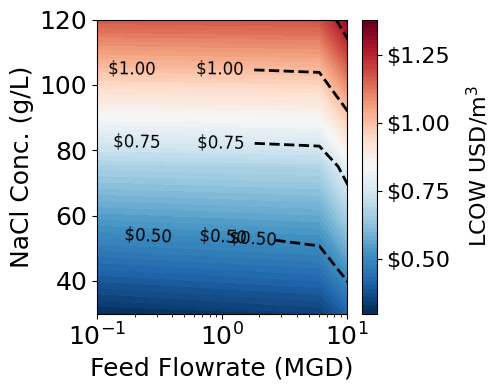

In [18]:
levels = np.linspace(min(z), max(z), 5).round(decimals=1)
levels = [0.5, 0.75, 1.0, 1.25]
fig, ax, cbar = contour_LCOW(MGD_vals, conc_vals, grid, levels, x_label='Feed Flowrate (MGD)', y_label='NaCl Conc. (g/L)', z_label='LCOW '+'USD/m$^3$', x_scale='log', low=min(z), mid=(max(z) + min(z))/2, high=max(z), xlimits = [0.1, 10], ylimits = [min(conc_vals), max(conc_vals)], cmap_pallete="RdBu_r")
# fig.savefig('/Users/zbinger/PV_RO_Flow_vs_Conc_3.png',dpi=900)
plt.show()

[[0.08404062 0.0791084  0.07890029 0.07884633 0.0788087  0.07880016
  0.07878368 0.07878084]
 [0.08144189 0.07890706 0.07883324 0.07880753 0.07879534 0.07878276
  0.07877656 0.07876954]
 [0.09012601 0.07885593 0.07881526 0.07878544 0.078781   0.07877443
  0.07877224 0.07876855]
 [0.08009526 0.0788415  0.07879249 0.0787811  0.07877672 0.07877069
  0.07876749 0.07876478]
 [0.07968396 0.07881205 0.07877998 0.0787712  0.07876724 0.07876664
  0.07876489 0.07876353]]
[0.07876353200819233, 0.08160415160157028, 0.08444477119494823, 0.08728539078832616, 0.0901260103817041]


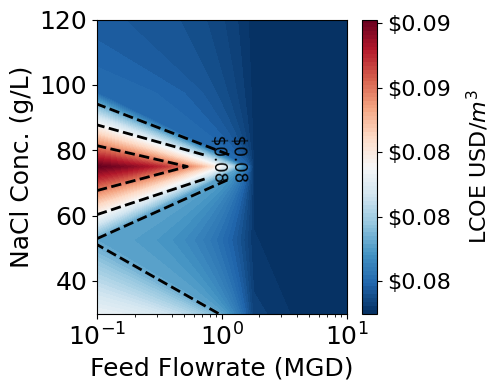

In [ ]:
metric = 'LCOE'
units = 'USD/$m^3$'
x,y,z = get_data(temp_dict, metric)
print(grid)
levels = np.linspace(min(z), max(z), 5).tolist()
print(levels)
# levels = [0.5, 1.0, 1.5, 2.0]
fig, ax, cbar = contour(MGD_vals, conc_vals, grid, levels, x_label='Feed Flowrate (MGD)', y_label='NaCl Conc. (g/L)', z_label= metric+ ' ' + units, x_scale='log', low=min(z), mid=(max(z) + min(z))/2, high=max(z), xlimits = [0.1, 10], ylimits = [min(conc_vals), max(conc_vals)], cmap_pallete="RdBu_r")
plt.show()

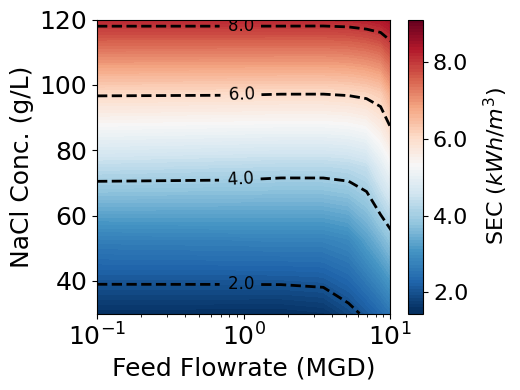

In [ ]:
metric = 'specific_electric_energy_consumption'
units = 'USD/$m^3$'
x,y,z = get_data(temp_dict, metric)
# levels = np.linspace(min(z), max(z), 5).tolist()
levels = [2, 4, 6, 8]
fig, ax, cbar = contour_SEC(MGD_vals, conc_vals, grid, levels, x_label='Feed Flowrate (MGD)', y_label='NaCl Conc. (g/L)', z_label= metric+ ' ' + units, x_scale='log', low=min(z), mid=(max(z) + min(z))/2, high=max(z), xlimits = [0.1, 10], ylimits = [min(conc_vals), max(conc_vals)], cmap_pallete="RdBu_r")
# fig.savefig('/Users/zbinger/PV_RO_SEC_vs_Flow_Conc_1.png',dpi=900)
plt.show()

In [ ]:
def contour_capcost(x, y, z, levels, x_label='', y_label='', z_label='', x_scale='log', y_scale='linear', low=-1, mid=0, high=1, xlimits = [0.001, 0.1], ylimits = [30, 150], cmap_pallete="RdBu_r", **kwargs):

    divnorm = colors.TwoSlopeNorm(vmin=low, vcenter=mid, vmax=high)
    # divnorm = colors.LogNorm(vmin=low, vmax=high)

    manual_locations = [(1, 0), (1, 90), (1, 110), (1, 135)]
    manual_locations = False

    fig, ax = plt.subplots(figsize=(5,4))
    if levels != None:
        cs2 = ax.contourf(x, y, z, 100, cmap=cmap_pallete, norm=divnorm)
        cs3 = ax.contour(x, y, z, levels, colors='k', linewidths=2, linestyles='dashed', norm=divnorm)
        # cs2 = ax.contourf(x, y, z, locator=ticker.LogLocator(), cmap='RdBu_r')
        # cs2 = ax.contourf(x, y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
        # cs3 = ax.contour(x, y, z, levels, colors='k', linewidths=2, linestyles='dashed', locator=ticker.LogLocator())
        ax.clabel(cs3, fmt='$%1.2f   ', colors='k', fontsize=12, inline_spacing=10, rightside_up=True)
        cbar = fig.colorbar(cs2)
    else:
        cs1 = ax.contourf(x, y, z, cmap=cmap_pallete, norm=divnorm)
        cbar = fig.colorbar(cs1)


    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()

    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_fontsize(16)

    cbar.ax.yaxis.set_major_formatter('${x:1.0f}')
    cbar.ax.get_yaxis().labelpad = 10
    cbar.ax.set_ylabel('Capital Cost ($ Mil)', rotation=90, fontsize=16)

    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_xlim(xlimits[0],xlimits[1])
    ax.set_ylim(ylimits[0],ylimits[1])
    ax.tick_params(axis='x', labelsize = 18)
    ax.tick_params(axis='y', labelsize = 18)
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    fig.tight_layout()
    plt.locator_params(axis='y', nbins=5)
    return fig, ax, cbar

In [19]:
metric = 'total_capital_cost'
units = 'USD/$m^3$'
x,y,z = get_data(temp_dict, metric)
levels = np.linspace(min(z)/1e6, max(z)/4e6, 5).round(decimals=1).tolist()
levels = [0.5, 1, 5, 10, 20]
print(min(z),max(z))
fig, ax, cbar = contour_capcost(MGD_vals, conc_vals, grid/1e6, levels, x_label='Feed Flowrate (MGD)', y_label='NaCl Conc. (g/L)', z_label= metric+ ' ' + units, x_scale='log', low=min(z)/1e6, mid=(0.25*max(z)/1e6), high=60, xlimits = [0.1, 10], ylimits = [min(conc_vals), max(conc_vals)], cmap_pallete="RdBu_r")
# fig.savefig('/Users/zbinger/CapCost_vs_FlowvsConc_3.png',dpi=900)
plt.show()

115803.2633831912 47737571.14895225


NameError: name 'contour_capcost' is not defined

In [20]:
oversize_fact = np.linspace(0.5,3,6)
count = 0
new_dict = {}
for idx, val in enumerate(oversize_fact):
    m = PV_RO.model_setup(0.0438, 35, 0.5)
    m.fs.energy.pv.oversize_factor = val
    try:
        m, results = PV_RO.run(m)
    except AttributeError:
        print('"PySAMWaterTAP" object has no attribute "num_inverters"')
        m, results = m, np.nan
    except:
        print('Something else went wrong')
        m, results = m, np.nan
    
    new_dict['Scenario {}'.format(count)]={'idx1':idx,'var1':val, 'model':m, 'results':results}
    count += 1

2023-03-02 20:48:08 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable flow_vol_phase was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch all relevant variables (i.e. call them or set an initial value) before using the calculate_scaling_factor method.
2023-03-02 20:48:08 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable mass_frac_phase_comp was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch al

In [21]:
def get_oversize_data(data_dict):
    over_factor, cap_cost, op_cost, ro_elec, pv_elec, pv_frac, lcow, lcoe = [], [],[], [], [], [], [], []
    for key, val in data_dict.items():
        over_factor.append(val['var1'])
        lcow.append(np.round(val['model'].fs.sys_costing.LCOW(),decimals = 3))
        lcoe.append(np.round(val['model'].fs.sys_costing.LCOE(),decimals = 3))
        cap_cost.append(np.round(val['model'].fs.sys_costing.total_capital_cost()/1e6,decimals = 2))
        op_cost.append(np.round(val['model'].fs.sys_costing.total_operating_cost()/1e6,decimals = 2))
        ro_elec.append(np.round(val['model'].fs.treatment.costing.aggregate_flow_electricity(),decimals = 1))
        pv_elec.append(np.round(-1*(val['model'].fs.energy.pv.electricity()),decimals = 1))
        pv_frac.append(np.round(-1*(val['model'].fs.energy.pv.electricity())/val['model'].fs.treatment.costing.aggregate_flow_electricity(),decimals = 3))

    # frame = pd.DataFrame()
    frame  = pd.DataFrame(np.transpose([over_factor, lcow, lcoe, cap_cost, op_cost, ro_elec, pv_elec, pv_frac]), columns = ['Oversize Factor', 'LCOW ($/m3)', 'LCOE ($/m3)', 'Cap Cost ($ Mil)', 'Op Cost ($ Mil/yr)', 'RO Electric Demand (kW)', 'PV Electric Generation (kW)', 'PV Electric Fraction'])
    return frame
    

In [22]:
df1 = get_oversize_data(new_dict)

In [23]:
df1['Flow (MGD)'] = 1
df1['Conc (g/L)'] = 35

In [24]:
df1

,Oversize Factor,LCOW ($/m3),LCOE ($/m3),Cap Cost ($ Mil),Op Cost ($ Mil/yr),RO Electric Demand (kW),PV Electric Generation (kW),PV Electric Fraction,Flow (MGD),Conc (g/L)
0,0.5,0.348,0.0,1.25,0.16,205.8,53.3,0.259,1,35
1,1.0,0.348,0.0,1.25,0.16,205.8,53.3,0.259,1,35
2,1.5,0.348,0.0,1.25,0.16,205.8,53.3,0.259,1,35
3,2.0,0.348,0.0,1.25,0.16,205.8,53.3,0.259,1,35
4,2.5,0.348,0.0,1.25,0.16,205.8,53.3,0.259,1,35
5,3.0,0.348,0.0,1.25,0.16,205.8,53.3,0.259,1,35


In [25]:
tab = cm = plt.get_cmap('tab20') 
color1 = '#2f5c8c'
# color1 = tab(0)
color2 = '#c07432'
color3 = '#474747'

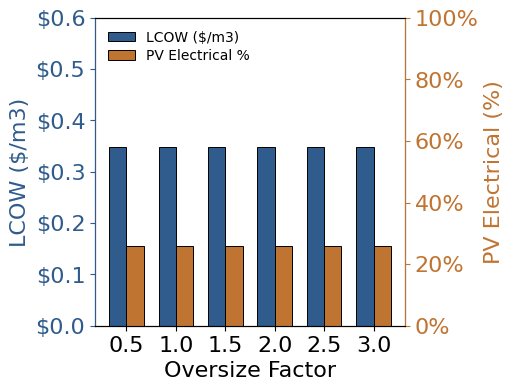

In [26]:
x = np.arange(len(df1['Oversize Factor']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(4,4))
ax2 = ax.twinx()

rects1 = ax.bar(x - width/2, df1['LCOW ($/m3)'], width, edgecolor='k', linewidth=0.7, color=color1, label='LCOW ($/m3)')
rects2 = ax2.bar(x + width/2, 100*df1['PV Electric Fraction'], width, edgecolor='k', linewidth=0.7, color=color2, label='PV Electrical %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x, df1['Oversize Factor'].to_list())

ax.set_xlabel('Oversize Factor', fontsize=16)
ax.set_ylabel('LCOW ($/m3)', fontsize=16)
ax2.set_ylabel('PV Electrical (%)', fontsize=16)
ax.set_ylim(0,0.6)
ax2.set_ylim(0,100)
ax.tick_params(axis='x', labelsize = 16)
ax.tick_params(axis='y', labelsize = 16)
ax2.tick_params(axis='y', labelsize = 16)
plt.locator_params(axis='y', nbins=5)
ax.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=(0,0.94))

ax.yaxis.set_major_formatter('${x:1.1f}')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

ax2.spines['left'].set_color(color1)
ax2.spines['right'].set_color(color2)
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax.yaxis.label.set_color(color1)
ax2.yaxis.label.set_color(color2)


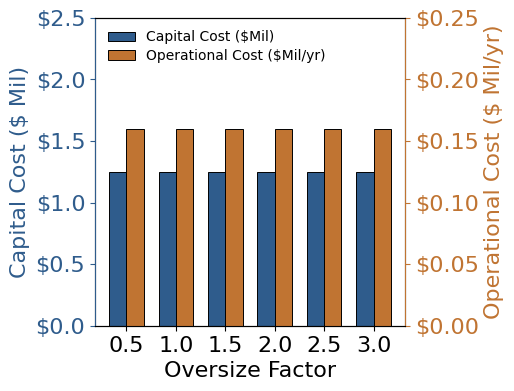

In [27]:
x = np.arange(len(df1['Oversize Factor']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(4,4))
ax2 = ax.twinx()

rects1 = ax.bar(x - width/2, df1['Cap Cost ($ Mil)'], width, edgecolor='k', linewidth=0.7, color=color1, label='Capital Cost ($Mil)')
rects2 = ax2.bar(x + width/2, df1['Op Cost ($ Mil/yr)'], width, edgecolor='k', linewidth=0.7, color=color2, label='Operational Cost ($Mil/yr)')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x, df1['Oversize Factor'].to_list())

ax.set_xlabel('Oversize Factor', fontsize=16)
ax.set_ylabel('Capital Cost ($ Mil)', fontsize=16)
ax2.set_ylabel('Operational Cost ($ Mil/yr)', fontsize=16)
ax.set_ylim(0,2.5)
ax2.set_ylim(0,0.25)
ax.tick_params(axis='x', labelsize = 16)
ax.tick_params(axis='y', labelsize = 16)
ax2.tick_params(axis='y', labelsize = 16)
plt.locator_params(axis='y', nbins=5)

ax.yaxis.set_major_formatter('${x:1.1f}')
ax2.yaxis.set_major_formatter('${x:0.2f}')

ax.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=(0,0.94))

ax2.spines['left'].set_color(color1)
ax2.spines['right'].set_color(color2)
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax.yaxis.label.set_color(color1)
ax2.yaxis.label.set_color(color2)

In [28]:
def get_oversize_data_pv(data_dict):
    over_factor, pv_cap_cost, pv_fixed_op, pv_fixed_op_capacity, pv_var_op, pv_an_gen, pv_land, lcoe_A, lcoe_B = [], [],[], [], [], [], [], [], []
    for key, val in data_dict.items():
        over_factor.append(val['var1'])
        pv_cap_cost.append(np.round(val['model'].fs.energy.pv.costing.capital_cost(),decimals = -2))
        pv_fixed_op.append(np.round(val['model'].fs.energy.pv.costing.fixed_operating_cost(),decimals = -1))
        pv_fixed_op_capacity.append(np.round(val['model'].fs.energy.costing.photovoltaic.fixed_operating_by_capacity(),decimals = 1))
        pv_var_op.append(np.round(val['model'].fs.energy.pv.costing.variable_operating_cost(),decimals = -1))
        pv_an_gen.append(np.round(val['model'].fs.energy.pv.costing.annual_generation(),decimals = 2))
        pv_land.append(np.round(val['model'].fs.energy.pv.costing.land_area(),decimals = 2))
        lcoe_A.append(np.round((100*val['model'].fs.sys_costing.LCOE()),decimals = 3))
        lcoe_B.append(np.round((
            100*((val['model'].fs.energy.pv.costing.capital_cost())*
            (val['model'].fs.sys_costing.factor_capital_annualization())+
            (val['model'].fs.energy.pv.costing.fixed_operating_cost()))/
            ((1000*val['model'].fs.energy.pv.costing.annual_generation())
            *(val['model'].fs.sys_costing.utilization_factor()))),
            decimals = 3))


    # frame = pd.DataFrame()
    frame  = pd.DataFrame(np.transpose([over_factor, pv_cap_cost, pv_fixed_op, pv_fixed_op_capacity, pv_var_op, pv_an_gen, pv_land, lcoe_A, lcoe_B]), columns = ['Oversize Factor', 'Cap Cost ($)', 'Fixed Op ($)', 'Fixed Op Capacity($)', 'Var Op ($/yr)', 'PV Annual Gen (MWh/yr)', 'Land Req (acre)', 'LCOE A (Cents/kWh)', 'LCOE B (Cents/kWh)'])
    return frame

In [29]:
df2 = get_oversize_data_pv(new_dict)
df2

,Oversize Factor,Cap Cost ($),Fixed Op ($),Fixed Op Capacity($),Var Op ($/yr),PV Annual Gen (MWh/yr),Land Req (acre),LCOE A (Cents/kWh),LCOE B (Cents/kWh)
0,0.5,151400.0,0.0,0.0,0.0,467566.06,0.0,0.035,0.003
1,1.0,151400.0,0.0,0.0,0.0,467566.06,0.0,0.035,0.003
2,1.5,151400.0,0.0,0.0,0.0,467566.06,0.0,0.035,0.003
3,2.0,151400.0,0.0,0.0,0.0,467566.06,0.0,0.035,0.003
4,2.5,151400.0,0.0,0.0,0.0,467566.06,0.0,0.035,0.003
5,3.0,151400.0,0.0,0.0,0.0,467566.06,0.0,0.035,0.003


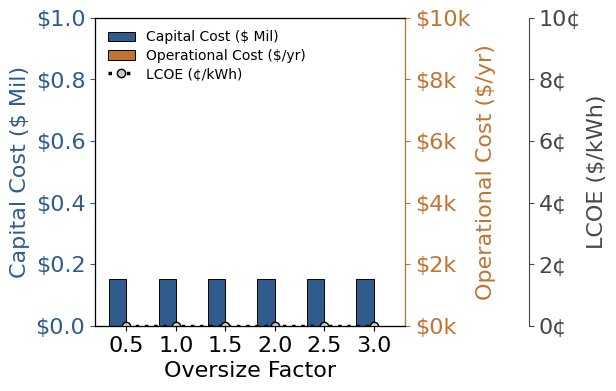

In [30]:
x = np.arange(len(df2['Oversize Factor']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(4,4))
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.4))

rects1 = ax.bar(x - width/2, df2['Cap Cost ($)']/1e6, width, edgecolor='k', linewidth=0.7, color=color1, label='Capital Cost ($ Mil)')
rects2 = ax2.bar(x + width/2, df2['Fixed Op ($)']/1e3, width, edgecolor='k', linewidth=0.7, color=color2, label='Operational Cost ($/yr)')
line = ax3.plot(x, df2['LCOE B (Cents/kWh)'], ls=':', marker='o', mec='k', mfc='#c9c9c9', linewidth=2.5, color='k', label='LCOE (\u00a2/kWh)')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x, df2['Oversize Factor'].to_list())

ax.set_xlabel('Oversize Factor', fontsize=16)
ax.set_ylabel('Capital Cost ($ Mil)', fontsize=16)
ax2.set_ylabel('Operational Cost ($/yr)', fontsize=16)
ax3.set_ylabel('LCOE ($/kWh)', fontsize=16)
ax.set_ylim(0,1)
ax2.set_ylim(0,10)
ax3.set_ylim(0,10)
ax.tick_params(axis='x', labelsize = 16)
ax.tick_params(axis='y', labelsize = 16)
ax2.tick_params(axis='y', labelsize = 16)
ax3.tick_params(axis='y', labelsize = 16)
plt.locator_params(axis='y', nbins=5)

ax.yaxis.set_major_formatter('${x:1.1f}')
ax2.yaxis.set_major_formatter('${x:0.0f}k')
ax3.yaxis.set_major_formatter('{x:1.0f}\u00a2')

ax.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=(0,0.94))
ax3.legend(loc='upper left', frameon=False, bbox_to_anchor=(0,0.88))

ax2.spines['left'].set_color(color1)
ax2.spines['right'].set_color(color2)
ax3.spines['right'].set_color(color3)
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax3.tick_params(axis='y', colors=color3)
ax.yaxis.label.set_color(color1)
ax2.yaxis.label.set_color(color2)
ax3.yaxis.label.set_color(color3)

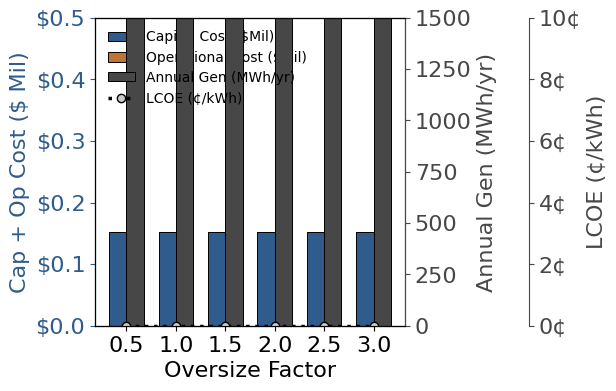

In [31]:
x = np.arange(len(df2['Oversize Factor']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(4,4))
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.4))

rects1 = ax.bar(x - width/2, df2['Cap Cost ($)']/1e6, width, edgecolor='k', linewidth=0.7, color=color1, label='Capital Cost ($Mil)')
rects2 = ax.bar(x - width/2, df2['Fixed Op ($)']/1e6, width, bottom=df2['Cap Cost ($)']/1e6, edgecolor='k', linewidth=0.7, color=color2, label='Operational Cost ($Mil)')
rects3 = ax2.bar(x + width/2, df2['PV Annual Gen (MWh/yr)'], width, edgecolor='k', linewidth=0.7, color=color3, label='Annual Gen (MWh/yr)')
line = ax3.plot(x, df2['LCOE B (Cents/kWh)'], ls=':', marker='o', mec='k', mfc='#c9c9c9', linewidth=2.5, color='k', label='LCOE (\u00a2/kWh)')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x, df2['Oversize Factor'].to_list())

ax.set_xlabel('Oversize Factor', fontsize=16)
ax.set_ylabel('Cap + Op Cost ($ Mil)', fontsize=16)
ax2.set_ylabel('Annual Gen (MWh/yr)', fontsize=16)
ax3.set_ylabel('LCOE (\u00a2/kWh)', fontsize=16)
ax.set_ylim(0,0.5)
ax2.set_ylim(0,1500)
ax3.set_ylim(0,10)
ax.tick_params(axis='x', labelsize = 16)
ax.tick_params(axis='y', labelsize = 16)
ax2.tick_params(axis='y', labelsize = 16)
ax3.tick_params(axis='y', labelsize = 16)
plt.locator_params(axis='y', nbins=5)

ax.yaxis.set_major_formatter('${x:1.1f}')
ax2.yaxis.set_major_formatter('{x:0.0f}')
ax3.yaxis.set_major_formatter('{x:1.0f}\u00a2')

ax.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=(0,0.87))
ax3.legend(loc='upper left', frameon=False, bbox_to_anchor=(0,0.80))

ax2.spines['left'].set_color(color1)
ax2.spines['right'].set_color(color3)
ax3.spines['right'].set_color(color3)
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color3)
ax3.tick_params(axis='y', colors=color3)
ax.yaxis.label.set_color(color1)
ax2.yaxis.label.set_color(color3)
ax3.yaxis.label.set_color(color3)

In [32]:
def sim_rec_vs_conc(rec_vals, conc_vals, Q_basis=1):
    count = 0
    for idx1, conc_val in enumerate(conc_vals):
        for idx2, rec_val in enumerate(rec_vals):
            print((Q_basis, conc_val, rec_val))
            try:
                m = PV_RO.model_setup(Q_basis, conc_val, rec_val)
                try:
                    m, results = PV_RO.run(m)
                    case = 'Optimal'
                    lcow = m.fs.sys_costing.LCOW()
                    recovery = m.fs.treatment.ro.recovery_vol_phase[0, "Liq"]()
                except:
                    print('Something else went wrong during solving and optimization')
                    m, results = m, np.nan
                    lcow = np.nan
                    recovery = np.nan
                    case = 'Infeasible'
            except:
                print('Something went wrong during initialization')
                m, results = m, np.nan
                case = 'Infeasible'
                lcow = np.nan
                recovery = np.nan
                
            temp_dict['Scenario {}'.format(count)]={'idx1':idx1,'idx2':idx2,'var1':conc_val, 'var2':rec_val, 'model':m, 'results':results, 'Condition':case, 'LCOW':lcow, 'Rec':recovery}
            count += 1
    return m, results, temp_dict

In [33]:
temp_dict = {}
x_res = 6
y_res = 8

In [34]:
MGD_vals = np.linspace(0.1, 12, x_res)
Q_vals = mgd_to_m3s(MGD_vals)
conc_vals = np.linspace(30, 120, y_res)
rec_vals = np.linspace(0.25, 0.75, x_res)

In [35]:
shape = (len(conc_vals),len(rec_vals))
grid = np.empty(shape, dtype=float, order='C')

In [36]:
m, results, temp_dict = sim_rec_vs_conc(rec_vals, conc_vals, Q_basis=mgd_to_m3s([1])[0])

(0.0438, 30.0, 0.25)
2023-03-02 20:48:15 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable flow_vol_phase was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch all relevant variables (i.e. call them or set an initial value) before using the calculate_scaling_factor method.
2023-03-02 20:48:15 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable mass_frac_phase_comp was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is re

In [37]:
def get_rec_vs_conc_data(data_dict, metric):
    x, y, z = [], [],[]
    for key, val in data_dict.items():
        x.append(val['var1'])
        y.append(val['var2'])
        if val['Condition'] == 'Optimal':
            try:
                z.append(getattr(val['model'].fs.sys_costing, metric)())
                grid[val['idx1'],val['idx2']] = getattr(val['model'].fs.sys_costing, metric)()
            except:
                print('fail')
                z.append(np.nan)
                grid[val['idx1'],val['idx2']] = np.nan
        else:
            print(val['Condition'])
            z.append(np.nan)
            grid[val['idx1'],val['idx2']] = np.nan
    return x,y,z

In [38]:
x,y,z = get_rec_vs_conc_data(temp_dict, 'LCOW')


Infeasible
Infeasible


In [39]:
frame  = pd.DataFrame(temp_dict)
frame = frame.transpose()
frame

,idx1,idx2,var1,var2,model,results,Condition,LCOW,Rec
Scenario 0,0,0,30.0,0.25,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.314702,0.558971
Scenario 1,0,1,30.0,0.35,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.314702,0.558971
Scenario 2,0,2,30.0,0.45,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.314702,0.558971
Scenario 3,0,3,30.0,0.55,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.314702,0.558971
Scenario 4,0,4,30.0,0.65,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.314702,0.558971
Scenario 5,0,5,30.0,0.75,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.314702,0.558971
Scenario 6,1,0,42.857143,0.25,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.404118,0.500683
Scenario 7,1,1,42.857143,0.35,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.404118,0.500683
Scenario 8,1,2,42.857143,0.45,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.404118,0.500683
Scenario 9,1,3,42.857143,0.55,[None],{'Problem': [{'Name': <pyomo.opt.results.conta...,Optimal,0.404118,0.500683


In [40]:
print(rec_vals)
print(conc_vals)
print(min(z), max(z))

[0.25 0.35 0.45 0.55 0.65 0.75]
[ 30.          42.85714286  55.71428571  68.57142857  81.42857143
  94.28571429 107.14285714 120.        ]
0.31470221400536635 1.1719180104117688


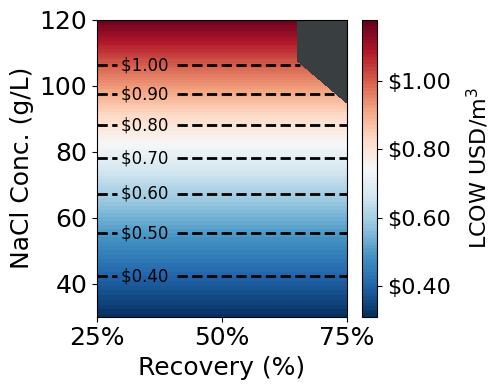

In [41]:
levels = np.linspace(min(z), max(z), 5).round(decimals=1)
levels = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fig, ax, cbar = contour_LCOW(rec_vals, conc_vals, grid, levels, x_label='Recovery (%)', y_label='NaCl Conc. (g/L)', z_label='LCOW '+'USD/m$^3$', x_scale='linear', low=min(z), mid=(max(z) + min(z))/2, high=max(z), xlimits = [min(rec_vals), max(rec_vals)], ylimits = [min(conc_vals), max(conc_vals)], cmap_pallete="RdBu_r", contour_x_pos=0.35, contour_label_space=20)
# fig.savefig('/Users/zbinger/PV_RO_Flow_vs_Conc_3.png',dpi=900)
plt.show()

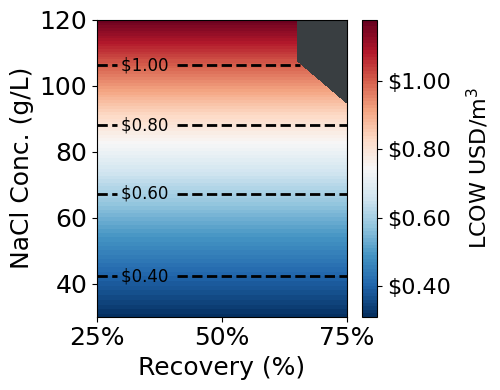

In [60]:
levels = np.linspace(min(z), max(z), 5).round(decimals=1)
levels = [0.4, 0.6, 0.8, 1.0]
fig, ax, cbar = contour_LCOW(rec_vals, conc_vals, grid, levels, x_label='Recovery (%)', y_label='NaCl Conc. (g/L)', z_label='LCOW '+'USD/m$^3$', x_scale='linear', low=min(z), mid=(max(z) + min(z))/2, high=max(z), xlimits = [min(rec_vals), max(rec_vals)], ylimits = [min(conc_vals), max(conc_vals)], cmap_pallete="RdBu_r", contour_x_pos=0.35, contour_label_space=20)
fig.savefig('/Users/zbinger/PV_RO_Flow_vs_Conc_Surrogate.png',dpi=900)
plt.show()

In [43]:
m.fs.treatment.items()

<generator object IndexedComponent.items.<locals>.<genexpr> at 0x2a7e8bed0>

In [44]:
from idaes.core import (
    FlowsheetBlock,
    MaterialBalanceType,
    EnergyBalanceType,
    MomentumBalanceType,
)

In [45]:
new_m = PV_RO.build_ro_pv()

In [46]:
assert hasattr(new_m.fs, "energy")
assert hasattr(new_m.fs, "treatment")
print(stats.number_variables(new_m), stats.number_unused_variables(new_m), stats.degrees_of_freedom(new_m))

207 2 16


In [47]:
for component in ['feed','product','disposal','p1', 'ro', 'erd']:
    unit = getattr(m.fs.treatment, component)
    print(unit)
    assert not unit.config.dynamic
    assert not unit.config.has_holdup
    if component =='feed':
        assert (unit.properties[0].flow_vol_phase)

fs.treatment.feed
fs.treatment.product
fs.treatment.disposal
fs.treatment.p1
fs.treatment.ro
fs.treatment.erd


In [48]:
PV_RO.set_operating_conditions(new_m)

2023-03-02 20:49:08 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable flow_vol_phase was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch all relevant variables (i.e. call them or set an initial value) before using the calculate_scaling_factor method.
2023-03-02 20:49:08 [WARNING] idaes.watertap.property_models.NaCl_prop_pack: While using the calculate_state method on fs.treatment.feed.properties[0.0], variable mass_frac_phase_comp was provided as an argument in var_args, but it does not have a scaling factor. This suggests that the calculate_scaling_factor method has not been used or the variable was created on demand after the scaling factors were calculated. It is recommended to touch al

In [49]:
from idaes.core.solvers import get_solver

In [50]:
solver = get_solver()
optarg = solver.options
new_m.fs.treatment.feed.initialize(optarg=optarg)
PV_RO.initialize_treatment(new_m)
PV_RO.initialize_energy(new_m)

2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.feed: Initialization Complete.

RO Membrane Area Estimate = 600.0 m^2 assuming a 30.0 LMH Water Flux

2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.p1.control_volume: Initialization Complete
2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.p1: Initialization Complete: optimal - Optimal Solution Found
2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.ro.feed_side: Initialization Complete
2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.ro: Initialization Complete: optimal - Optimal Solution Found
2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.erd.control_volume: Initialization Complete
2023-03-02 20:49:08 [INFO] idaes.init.fs.treatment.erd: Initialization Complete: optimal - Optimal Solution Found

Feed Flowrate = 0.228 MGD ; Feed Side Velocity = 0.55 m/s ; Solute Conc. In = 30.5 g/L 

Loading surrogate file...
2023-03-02 20:49:08 [INFO] idaes.core.surrogate.pysmo_surrogate: Decode surrogate. type=rbf


In [51]:
stats.degrees_of_freedom(new_m.fs.treatment.ro)

4

In [52]:
print(stats.degrees_of_freedom(new_m))
print(stats.number_variables(new_m))
print(stats.number_total_constraints(new_m))
print(stats.number_unused_variables(new_m))

1
207
172
1


In [53]:
from idaes.core.util.scaling import (
    calculate_scaling_factors,
    unscaled_variables_generator,
    badly_scaled_var_generator,
)

In [54]:
unscaled_var_list = list(unscaled_variables_generator(m))
for var in unscaled_var_list:
    print(var)

fs.treatment.product.properties[0.0].flow_vol_phase[Liq]
fs.treatment.product.properties[0.0].dens_mass_phase[Liq]
fs.treatment.product.properties[0.0].mass_frac_phase_comp[Liq,H2O]
fs.treatment.product.properties[0.0].mass_frac_phase_comp[Liq,NaCl]
fs.treatment.p1.ratioP[0.0]
fs.treatment.p1.costing.capital_cost
fs.treatment.ro.costing.capital_cost
fs.treatment.ro.costing.fixed_operating_cost
fs.treatment.erd.ratioP[0.0]
fs.treatment.erd.control_volume.properties_in[0.0].flow_vol_phase[Liq]
fs.treatment.erd.control_volume.properties_in[0.0].dens_mass_phase[Liq]
fs.treatment.erd.costing.capital_cost
fs.treatment.costing.aggregate_capital_cost
fs.treatment.costing.aggregate_fixed_operating_cost
fs.treatment.costing.aggregate_variable_operating_cost
fs.treatment.costing.aggregate_flow_electricity
fs.treatment.costing.aggregate_flow_costs[electricity]
fs.treatment.costing.total_capital_cost
fs.treatment.costing.maintenance_labor_chemical_operating_cost
fs.treatment.costing.total_operating

In [55]:
badly_scaled_var_list = list(badly_scaled_var_generator(m))
for var in badly_scaled_var_list:
    print(var[0])

fs.treatment.p1.costing.capital_cost
fs.treatment.ro.costing.capital_cost
fs.treatment.ro.costing.fixed_operating_cost
fs.treatment.erd.costing.capital_cost
fs.treatment.costing.aggregate_capital_cost
fs.treatment.costing.aggregate_fixed_operating_cost
fs.treatment.costing.aggregate_flow_costs[electricity]
fs.treatment.costing.total_capital_cost
fs.treatment.costing.total_operating_cost
fs.energy.pv.annual_energy
fs.energy.pv.costing.capital_cost
fs.energy.pv.costing.direct_cost
fs.energy.pv.costing.indirect_cost
fs.energy.pv.costing.sales_tax
fs.energy.pv.costing.system_capacity
fs.energy.pv.costing.land_area
fs.energy.pv.costing.annual_generation
fs.energy.costing.aggregate_capital_cost
fs.energy.costing.aggregate_flow_costs[electricity]
fs.energy.costing.total_capital_cost
fs.energy.costing.maintenance_labor_chemical_operating_cost
fs.energy.costing.total_operating_cost
fs.sys_costing.total_capital_cost
fs.sys_costing.total_operating_cost
